# VANGUARD LTD. AIRCRAFT INSIGHT

Vanguard, a Business Conglomerate, is interested in expanding its portfolio and has set its scope on purchasing and operating planes for both private and commercial enterprises. However, with no prior experience in the aviation sector, the company needs guidance on which airplanes to invest on as diffrerent airplanes pose different risk factors. In order to provide guidance to the company, intensive research on different airplane data will be done in order to generate insight on which airplanes pose the lowest risks. The insight will be used by the head of the new aviation division in deciding on which airplanes to purchase and operate.

### Objectives

1. Identify the airplane models and manufacturers with the lowest accident rates.

2. Determine which airplane engine types are associated with the lowest crash rates.

3. Identify the safest airplane operations with the lowest incidence of plane crashes.

## DATA UNDERSTANDING

The data to be used in the analysis was gotten from Kaggle, a data science platform, which has multiple datasets. 

The particular dataset was from the National Transportation Safety Board (NTSB). This dataset is comprised of aviation accidents data from 1962 to 2023 about civil aviation accidents and selected incidents within the United States, its territories and international waters. This makes the data relevant to this study as it includes all the relevant information regarding the accidents (the aircraft type, type of flight, the engine type, and the weather during the incident). All this data will make it possible to fulfill the objectives of the study. 
The dataset comprises of two csv files namely `AviationData.csv` and `USState_Codes.csv`. Let's load the two csv files one at a time in order to study their properties:

In [1]:
# Import the necessary libraries first
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### AVIATION DATA 

The first dataset is the `AviationData.csv`:

In [2]:
# Load the csv file
aviation = pd.read_csv('./Data/AviationData.csv',  encoding='latin1', low_memory=False)
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Let's inspect the dataframe

from Data_Info import description # A data function created to provide dataframe info and summary statistics

description(aviation)

-----The datatframe shape is as follows:-----

(88889, 31) 

-----The summary for the dataframe is as follows:-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       322

From the information above, the dataframe has a total of 88889 rows and 31 columns. Out of all the 31 columns, only four columns don't have missing values namely: `Event.ID`, `Investigation.Type`, `Accident.Number` and `Event.Date` columns. This is a **limitation** since the missing values may reduce the accuracy of the analysis. Most of the columns in the dataframe have string values and only five columns that have been included in the descriptive statistics have integer values.

The descriptive statistics on the `Number.Of.Engines` column provides more insight on what to expect. The column has a mean of 1.146585 indicating that on average the planes in the dataset have one engine. The maximum value for the column is 8 showing that in the records there are plane/s with 8 engines on board. 

The dataframe also includes columns which have data about the weather conditions, the phase of the flight at the time of the accident and the category, make and model of the aircraft involved. All this data justifies the use of this dataset as it will greatly help in reaching the objectives of the study.

### US STATES DATA

The second dataset is the `USState_Codes.csv` file. Let's analyze the dataset:

In [4]:
states = pd.read_csv('./Data/USState_Codes.csv')
states.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


A preview of the dataframe shows that the dataset contains a list of US States and the abbreviation used in the aviation dataframe. To ascertain whether this is the case, let's preview the `Location` column in the aviation dataframe:

In [5]:
aviation['Location']

0        MOOSE CREEK, ID
1         BRIDGEPORT, CA
2          Saltville, VA
3             EUREKA, CA
4             Canton, OH
              ...       
88884      Annapolis, MD
88885        Hampton, NH
88886         Payson, AZ
88887         Morgan, UT
88888         Athens, GA
Name: Location, Length: 88889, dtype: object

The column contains the exact location where the accident happen followed by an abbreviation of the state where the accident happened. Next, let's get some details about the dataframe:

In [6]:
description(states)

-----The datatframe shape is as follows:-----

(62, 2) 

-----The summary for the dataframe is as follows:-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None 

-----The descriptive statistics for the dataframe are as follows:-----

       US_State Abbreviation
count        62           62
unique       62           62
top     Alabama           AL
freq          1            1 



The dataframe has a total of 88 rows and two columns namely `US_State` and `Abbreviation` columns. The two columns have string data types meaning no descriptive statistics could be derived from them. The two columns also have no missing values which is an advantage.

The `states` dataframe will be used to link the location of the accident in the `aviation` dataframe with the exact state in which the accident happened.

## DATA PREPARATION

At this point, it is essential to manipulate and make the changes to the dataframe in order to make it beter suited for adata analysis. To begin with, there are a total of 31 columns in the `aviation` dataframe and most of the columns are not needed in the analysis and do not aid in us reaching our objectives. This can be remedied by dropping the columns that are not needed for the analysis: 

Firstly let's pick the columns in the dataframe that will be needed and drop the rest:

In [7]:
aviation.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
# First, add total minor, serious and fatal injuries to a new column 
aviation['Total.Injuries'] = aviation['Total.Fatal.Injuries'] + aviation['Total.Serious.Injuries'] + aviation['Total.Minor.Injuries'] 

# Create a list of the columns that seem relevant to the analysis
columns = ['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Total.Injuries','Aircraft.Category','Make', 
           'Model', 'Number.of.Engines', 'Engine.Type','Purpose.of.flight', 'Aircraft.damage']

# Assign the relevant columns to a new dataframe called aviation1
aviation_1 = aviation[columns]
aviation_1 = aviation_1.copy()

In [9]:
aviation_1.shape

(88889, 12)

The number of columns have dropped from 31 to 12 columns making it all the more easier to work with the new dataframe. Next, let's check the values in the `Make` column:

In [10]:
aviation['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In this case, some makes, like 'Cessna,' appear twice—once in sentence case and once with all letters capitalized. To resolve this, we should standardize the case for all values to eliminate repetition and ensure consistency:

In [11]:
# Set the values to be in title case
aviation_1['Make'] = aviation_1['Make'].apply(lambda x: str(x).title())

Let's do the same to the `Model` column:

In [12]:
aviation_1['Model'] = aviation_1['Model'].apply(lambda x: str(x).title())

Next, let's check on the years in which the accidents happened:

In [13]:
aviation_1['Event.Date'].unique()

array(['1948-10-24', '1962-07-19', '1974-08-30', ..., '2022-12-22',
       '2022-12-26', '2022-12-29'], dtype=object)

The values in this column are in string form and need to be converted to proper date format:

In [14]:
aviation_1['Event.Date'] = pd.to_datetime(aviation_1['Event.Date'])
aviation_1['Event.Date']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: Event.Date, Length: 88889, dtype: datetime64[ns]

Some cases are as early as 1948. It is best to filter out the incidences in order to avoid dealing with old planes that are either outdated or not even in the market anymore. Let's filter the df to only have incidences that not older than the year 2000.

In [15]:
# Filter the accidents to only include those not older than 2000
aviation_1 = aviation_1[aviation_1['Event.Date'].dt.year > 2000]

Next, let's check the unique values in the `Engine.Type` column:

In [16]:
aviation_1['Engine.Type'].unique()

array(['Reciprocating', 'Turbo Prop', nan, 'Turbo Fan', 'Turbo Shaft',
       'Turbo Jet', 'Unknown', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

Some of the values have either been inputted as `Uknown` or `NONE`. Let's drop these values so that we can remain with only the values referencing an engine type in the aviation industry:

In [17]:
# Filter the 'Unknown' and 'NONE' values in the column
aviation_1 = aviation_1[(aviation_1['Engine.Type'] != 'Unknown') & (aviation_1['Engine.Type'] != 'NONE')]

Let's ascertain whether the filtering has worked:

In [18]:
aviation_1['Engine.Type'].unique()

array(['Reciprocating', 'Turbo Prop', nan, 'Turbo Fan', 'Turbo Shaft',
       'Turbo Jet', 'Electric', 'Hybrid Rocket', 'Geared Turbofan', 'LR',
       'UNK'], dtype=object)

Next, some of the planes listed on the dataset were used for purposes other than commercial or private. Let's check the purposes listed in the dataset:

In [19]:
aviation_1['Purpose.of.flight'].unique()

array(['Personal', 'Instructional', nan, 'Positioning',
       'Aerial Application', 'Skydiving', 'Business', 'Public Aircraft',
       'Executive/corporate', 'Ferry', 'Aerial Observation',
       'Other Work Use', 'Flight Test', 'Unknown', 'Air Race/show',
       'Air Drop', 'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

Majority of the planes were used for purposes that do not alight with the data analysis since Vanguard Ltd. plans to use the planes ofr private and commercial purposes. After some research, I was able to come to the conclusion that the purposes that align with the analysis are `Business`, `Executive/corporate`, `Ferry`, `Personal` and `Positioning`. Let's filter the dataset to only remain with planes that alight with this. 

In [20]:
aviation_1 = aviation_1.loc[aviation_1['Purpose.of.flight'].isin(['Business',
                                                                  'Executive/corporate',
                                                                  'Personal'])]

## DATA CLEANING

Missing values and duplicated values pose an issue when performing data analysis and as such it is essential to deal with them in preparation for data analysis. Firstly, let's check whether any missing and duplicate values exist in our dataframes:

#### 1. AVIATION1 DATAFRAME

In [21]:
# Let's call out a  function embedded in the Data_Info script for previewing the number of missing and duplicate values
from Data_Info import cleaning 

# Check the aviation df for any missing and duplicate values
cleaning(aviation_1)

----Missing Values----

Total.Injuries        8360
Aircraft.Category     6107
Engine.Type           2376
Number.of.Engines     1026
Aircraft.damage        187
Location                 3
Country                  1
Investigation.Type       0
Event.Date               0
Make                     0
Model                    0
Purpose.of.flight        0
dtype: int64 

----Duplicate Values----

False    22591
True         4
Name: count, dtype: int64 



There are a lot of columns with missing values. However, only 17 rows are duplicate values so let's start by dropping the duplicate values:

In [22]:
# Drop the duplicate values
aviation_1 = aviation_1.drop_duplicates()
# Check whether the duplicate values have been dropped
aviation_1.duplicated().value_counts()

False    22591
Name: count, dtype: int64

After dealing with the duplicate values,let's now deal with the missing values. `Total.Injuries` column has around 12% of the values missing. It's an essential column that will be used in the analysis so it will be best to fill the missing values with the median as it is not affected by any outliers:

In [23]:
# Check the data type for the column
aviation_1['Total.Injuries'].dtype

dtype('float64')

In [24]:
# Fill the missing data with the column's median
aviation_1['Total.Injuries'] = aviation_1['Total.Injuries'].fillna(aviation_1['Total.Injuries'].median())

The next column to check is the `Purpose.of.flight` column. The column has a total of 6034 rows with missing values. This number is not significant and thus we can consider other options of dealing with missing values such as replacing the missing values with the mean, median or mode of the data. To begin this process, let's first check the column's data type:

In [25]:
aviation_1['Purpose.of.flight'].dtype

dtype('O')

The column has 'O' meaning it comprises of string values. This eliminates replacing the missing values with the mean since categorical data doesn't have a mean or a median. The next available option is replacing the missing values with the mode. Let's first create a function that replaces missing values in categorical columns with the column's mode:

In [26]:
# Create a function for replacing missing values with the mode
def fill_values(column):
    return aviation_1[column].fillna(aviation_1[column].value_counts().idxmax())

In [27]:
# Fill the missing values in the column with the mode
aviation_1['Purpose.of.flight'] = fill_values('Purpose.of.flight')

The next column is the `Number.of.Engines` column with a total of 4719 rows with missing values. Let's check the data type for the column first:

In [28]:
aviation_1['Number.of.Engines'].dtype

dtype('float64')

The data type in the column is floats. The next thing is deciding whether to fill the missing values with the mean, median or mode. The mean is prone to be affected by outliers while the median isn't and thus it would be a good option to use the median:

In [29]:
# Fill the missing values with the median
aviation_1['Number.of.Engines'] = aviation_1['Number.of.Engines'].fillna(aviation_1['Number.of.Engines'].median())

The last two columns that the missing values will be replaced are the `Aircraft.Category` and `Engine.Type` and the `Aircraft.damage` columns. Let's check the data types in the three columns:

In [30]:
print(f'The data type in the Aircraft Category column is {aviation_1['Aircraft.Category'].dtype}')
print(f'The data type in the Aircraft Damage column is {aviation_1['Aircraft.damage'].dtype}')
print(f'The data type in the Engine Type column is {aviation_1['Engine.Type'].dtype}')

The data type in the Aircraft Category column is object
The data type in the Aircraft Damage column is object
The data type in the Engine Type column is object


All of the columns comprise of string values. We will need to replace the missing values with the mode values of the three columns:

In [31]:
aviation_1['Aircraft.Category'] = fill_values('Aircraft.Category')
aviation_1['Aircraft.damage'] = fill_values('Aircraft.damage')
aviation_1['Engine.Type'] = fill_values('Engine.Type')

Next, let's check the remaining columns with missing values:

In [32]:
aviation_1.isna().sum()

Investigation.Type    0
Event.Date            0
Location              3
Country               1
Total.Injuries        0
Aircraft.Category     0
Make                  0
Model                 0
Number.of.Engines     0
Engine.Type           0
Purpose.of.flight     0
Aircraft.damage       0
dtype: int64

The remaining rows with missing values are very insignificant meaning they can be dropped:

In [33]:
# Drop the remaining missing values
aviation_1 = aviation_1.dropna()

Let's check once more if there are any missing values left:

In [34]:
aviation_1.isna().sum()

Investigation.Type    0
Event.Date            0
Location              0
Country               0
Total.Injuries        0
Aircraft.Category     0
Make                  0
Model                 0
Number.of.Engines     0
Engine.Type           0
Purpose.of.flight     0
Aircraft.damage       0
dtype: int64

Voila! There aren't any rows with missing values left. Let's check the final size of the dataframe.

In [35]:
aviation_1.shape

(22587, 12)

Let's now move on to the `states` dataframe.

#### 2. STATES DATAFRAME

In [36]:
# Check for any missing or duplicate values
cleaning(states)

----Missing Values----

US_State        0
Abbreviation    0
dtype: int64 

----Duplicate Values----

False    62
Name: count, dtype: int64 



The dataframe has no missing values nor duplicate values. This gives us the go ahead to proceed to data analysis.

## DATA ANALYSIS

After data cleaning and preparation, the datasets are now ready for analysis to derive valuable insights. The analysis will be conducted on a piecemeal basis, i.e., objective by objective.

### Objective 1: Identify the airplane makes and models with the lowest accident rates.

The goal of the first objective is to identify airplane models and manufacturers with the lowest accident rates. Aircraft with the best safety records will be the most advisable for use. This analysis will be conducted by examining which airplane makes and models appear the least in the dataset, as well as assessing the extent of damage sustained in accidents.

To begin with, let's check which manufacturers have the highest and lowest accident rates:


In [37]:
# Count the occurrences of each model
make_counts = aviation_1['Make'].value_counts()

# Filter models that have one accident
one_accident = make_counts[make_counts == 1]

# Get the 'Make' and 'Model' columns for these models
least_frequent_df=aviation_1[aviation_1['Model'].isin(one_accident.index)][['Make','Model','Aircraft.damage','Engine.Type', 
                                                                              'Number.of.Engines', 'Total.Injuries']]
least_frequent_df.reset_index(inplace=True)
least_frequent_df.drop(columns=['index'], inplace=True)

In [38]:
# Preview the new dataframe
least_frequent_df.head()

,Make,Model,Aircraft.damage,Engine.Type,Number.of.Engines,Total.Injuries
0,Jack Mcdaniel,Rans S-12,Substantial,Reciprocating,1.0,0.0
1,Christian,Rans S-12,Substantial,Reciprocating,1.0,0.0
2,Bradley,Midget Mustang,Substantial,Reciprocating,1.0,0.0
3,Raum,Rans S-12,Substantial,Reciprocating,1.0,0.0
4,Morrison,Rans S-12,Minor,Reciprocating,1.0,0.0


Next, let's find the top ten plane makes(manufacturers) who occur frequently in the dataframe:

In [39]:
# Assign the makes to models df
top_10_makes = least_frequent_df['Make'].value_counts().head(10)
top_10_makes

Make
Aerotrike            3
Raytheon             2
Dayton A Babcock     2
Pereyra              2
American Autogyro    2
Trick Trikes         2
Jack Mcdaniel        1
Sutphin              1
Korrison Tom         1
Team Inc             1
Name: count, dtype: int64

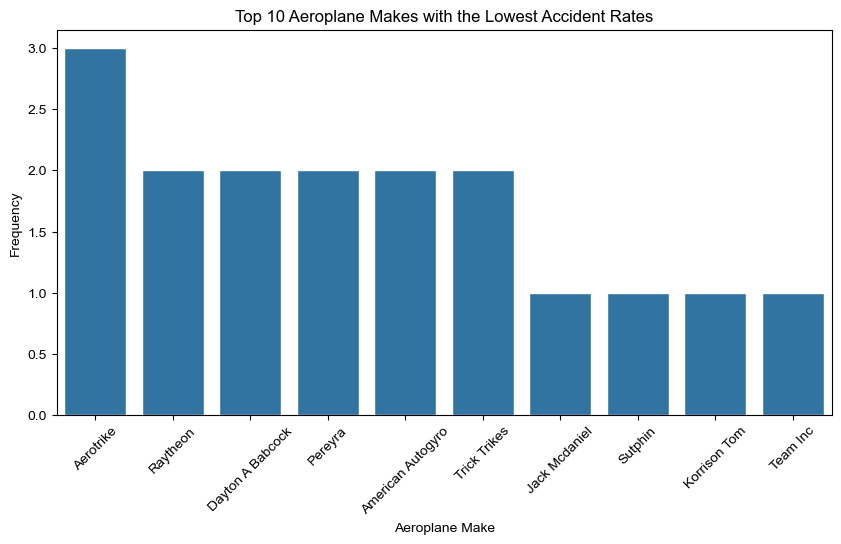

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_palette("muted")
sns.barplot(x=top_10_makes.index, y=top_10_makes)
plt.xticks(rotation=45)
ax.set_xlabel('Aeroplane Make')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Aeroplane Makes with the Lowest Accident Rates');

Now that we've identified the airplane manufacturers with only one recorded accidents, let's explore which models from these manufacturers have the lowest accident occurrences. Since there are a lot of models with low accident rates, the data will also be filtered with regard to the `Aircraft.damage` and `Total.Injuries` column where only planes with minor aircraft damage and less than 20 injuries will be shown.

In [56]:
# Filter the data to have only planes with minor aircraft damage and less than 20 Injuries
filtered = aviation_1.loc[(aviation_1['Aircraft.damage'] == 'Minor') & 
                                 (aviation_1['Total.Injuries']  < 20),['Make', 'Model', 'Engine.Type',
                                                                     'Purpose.of.flight', 'Event.Date']]

# Convert the filtered data to an excel file for importing into Tableau
filtered['Event.Year'] = filtered['Event.Date'].dt.year
filtered.drop('Event.Date', axis=1, inplace=True)
aviation_1.to_excel('./Data/Filtered_Aviation_Data.xlsx', index=False)

filtered_make = filtered['Make'].value_counts().head()

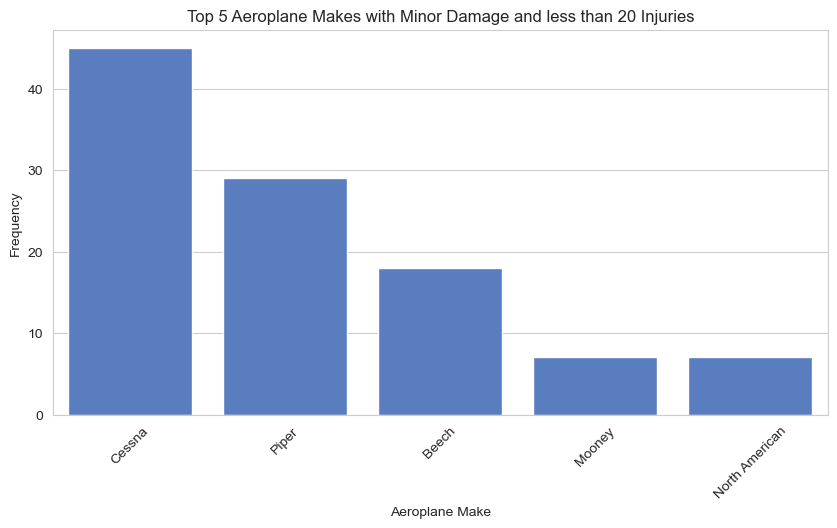

In [49]:
# Plot the results
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=filtered_make.index, y=filtered_make.values)
plt.xticks(rotation=45)
ax.set_xlabel('Aeroplane Make')
ax.set_ylabel('Frequency')
ax.set_title('Top 5 Aeroplane Makes with Minor Damage and less than 20 Injuries');

In [43]:
# Create a list of best 3 Models for each Make
best_models = {}
for i in filtered_make.head(3).index.tolist():
    models = filtered.loc[filtered['Make'] == i, 'Model']
    best_models[i] = models.value_counts().head().sort_values(ascending=False).index.tolist()
best_models_df = pd.DataFrame(best_models) 
best_models_df

,Cessna,Piper,Beech
0,172M,Pa-46-310P,58
1,402B,Pa-46-500Tp,V35
2,560,Pa28R,200
3,R182,Pa-32Rt-300T,C24R
4,525,Pa-31T1,A36


### Objective 2: Determine which airplane engine types are associated with the lowest crash rates.

The second objective will be to check which the types of engines of aircraft that were used by planes that had the lowest crashes. This will help in establishing which engine types are the most reliable and not prone to failure. We will use the `least_frequent_df` created in objective one since it contains the planes with the lowest crash rates

In [44]:
engines = filtered['Engine.Type'].value_counts().index.tolist()
engines_count = filtered['Engine.Type'].value_counts().values.tolist()

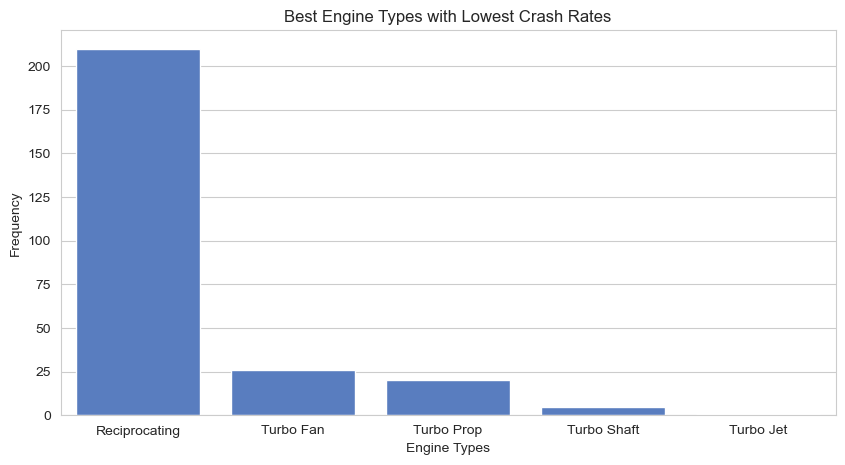

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x=engines, y=engines_count)
plt.xlabel('Engine Types')
plt.ylabel('Frequency')
plt.title('Best Engine Types with Lowest Crash Rates');

The three best engines to use are the `Reciprocating`, `Turbo Fan` and `Turbo Prop` respectively. 

### Objective 3: Identify the safest airplane operations with the lowest incidence of plane crashes.

This objective will aim to uncover the safest airplane operations that put the plane to the lowest risk of an accident. The insight derived from this will help quide Vanguard on choosing which operations to focus on and which to avoid in order to lower the probability of a plane crash

To do this, we will use the `filtered` which contains planes with one accident only, had minor damage after the accident and had less than 20 injuries:

In [46]:
purpose = filtered['Purpose.of.flight'].value_counts().index
purpose_count = filtered['Purpose.of.flight'].value_counts().values

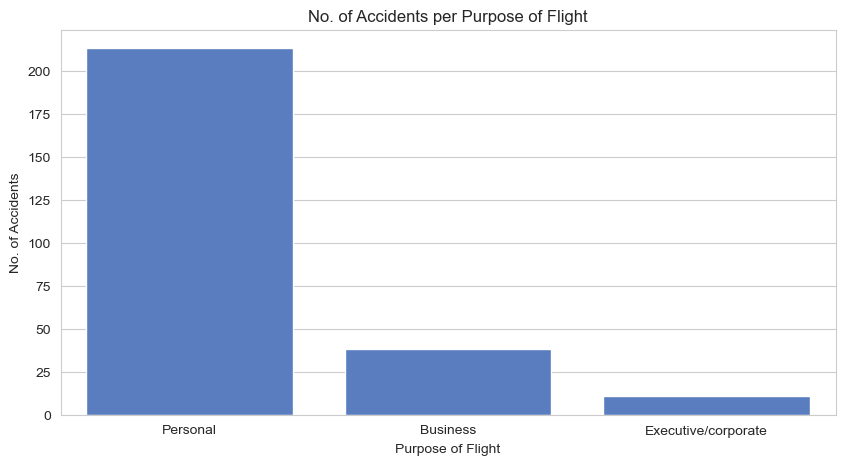

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x=purpose, y=purpose_count)
plt.xlabel('Purpose of Flight')
plt.ylabel('No. of Accidents')
plt.title('No. of Accidents per Purpose of Flight');

## Findings and Recommendations

**Objective 1: Identify the airplane models and manufacturers with the lowest accident rates.**

The goal of this objective was to identify airplane models and manufacturers with the lowest accident rates. After analysis, five airplane makes stood out to be the best since they had only one accident recorded. These planes were **Aerotrike, Raytheon, Dayton A Babcock, Pereyra** and **American Autogyro**. However, there were a lot of airplane manufacturers with record of one accident accross their fleet so further filtering was done to only remain with planes which sustained minimal damage after the crash and also had less than 20 total injuries. The top three manufacturers that stood out were **Cessna, Beech** and **Piper**. The models made by these manufacturers that also had very low accident rates are in the table below:

In [48]:
best_models_df

,Cessna,Piper,Beech
0,172M,Pa-46-310P,58
1,402B,Pa-46-500Tp,V35
2,560,Pa28R,200
3,R182,Pa-32Rt-300T,C24R
4,525,Pa-31T1,A36


**Objective 2: Determine which airplane engine types are associated with the lowest crash rates.**

The aim of this objective was to establishwhich engine types are the most reliable and not prone to failure. 
The three engine types that were common in airplanes that had only one recorded accident were **Reciprocating, Turbo Fan** and **Turbo Prop engines**. 
It will be advisable if these engines were put into consideration when the planes are being purchased since they have a good track record and seem reliable and not prone to failure. These engines are also very fuel efficient and adhere to the noise regulations as compared to engines such as the turbo jet engine which is very loud and fuel inefficient.

**Objective 3: Identify the safest airplane operations with the lowest incidence of plane crashes.**

The goal of this objective was to uncover the safest airplane operations that put the plane to the lowest risk of an accident. Planes used in the private enterprise have a higher probability of crashing while planes used in the business and executive/corporate sector have the lowest probability of crashing. This is because many private pilots may have less training, fewer flight hours, and less experience handling emergencies compared to corporate pilots. Moreover, planes used in the commercial sector tend to be more advanced and have advanced avionics and safety features. When operating the planes in the private sector, it will be advisable not to procure the plane to individuals  who are not well versed with the operation of that particular plane model.